In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the data
designs = pd.read_csv('raw_designs.csv')
corr = pd.read_csv('raw_correlation.csv')

def weighted_jaccard_similarity(x, y):
    x_nonzero = x[x != 0].index
    y_nonzero = y[y != 0].index
    xy_nonzero = x_nonzero.union(y_nonzero)
    intersection = x_nonzero.intersection(y_nonzero)
    
    if len(intersection) == 0:
        if len(xy_nonzero) == 0:
            return 1
        return 0
    
    weights = []
    
    # For each column in xy_nonzero, get the max between all its previous entries xy_nonzero
    for i in range(len(xy_nonzero)):
        weight = 1
        max_cor = 0
        for j in range(i):
            if corr.iloc[int(xy_nonzero[i]), int(xy_nonzero[j])] > max_cor:
                weight = 1 - corr.iloc[int(xy_nonzero[i]), int(xy_nonzero[j])]
        weight = float(weight)
        weights.append(weight)
    # make a dictionary where each non_zero column is a key and the value is the weight
    weights_dict = dict(zip(xy_nonzero, weights))
    
    # calculate the weighted jaccard similarity
    numerator = 0
    denominator = 0
    for i in xy_nonzero:
        numerator += min(x[i], y[i]) * weights_dict[i]
        denominator += max(x[i], y[i]) * weights_dict[i]  
    
    return numerator/denominator

def jaccard_similarity(x,y):
    
    x_nonzero = x[x != 0].index
    y_nonzero = y[y != 0].index
    xy_nonzero = x_nonzero.union(y_nonzero)
    intersection = x_nonzero.intersection(y_nonzero)
    
    if len(intersection) == 0:
        if len(xy_nonzero) == 0:
            return 1
        return 0
    
    numerator = 0
    denominator = 0
    for i in xy_nonzero:
        numerator += min(x[i], y[i])
        denominator += max(x[i], y[i])
    
    return numerator/denominator

def design_code_similarity_score(x,y):
    x = x.map(lambda i: 1 if i != 0 else 0)
    y = y.map(lambda i: 1 if i != 0 else 0)
    return weighted_jaccard_similarity(x, y)



In [4]:
# Create a function which gives the similarity score between 2 random indices from 0 to 999
def similarity_scores_generator(n):
    scores = []
    for i in range(n):
        x = designs.iloc[np.random.randint(0, 999)]
        y = designs.iloc[np.random.randint(0, 999)]
        scores.append(design_code_similarity_score(x, y))
        if i % 1000 == 0:
            print(i)
    return scores

def jaccard_similarity_generator(n):
    scores = []
    for i in range(n):
        x = designs.iloc[np.random.randint(0, 999)]
        y = designs.iloc[np.random.randint(0, 999)]
        scores.append(jaccard_similarity(x, y))
        if i % 1000 == 0:
            print(i)
    return scores


In [5]:
scores = similarity_scores_generator(30000)
scores2 = jaccard_similarity_generator(30000)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000


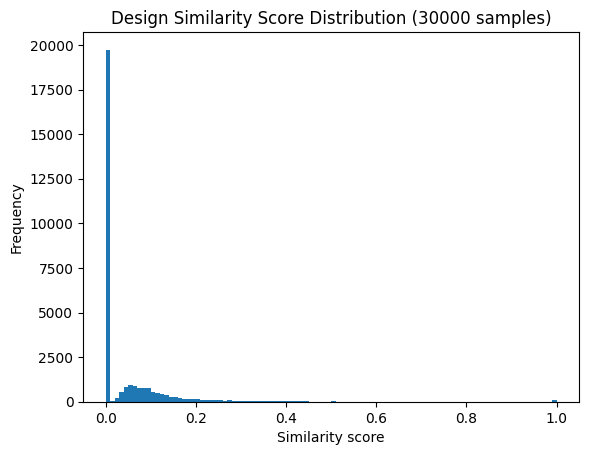

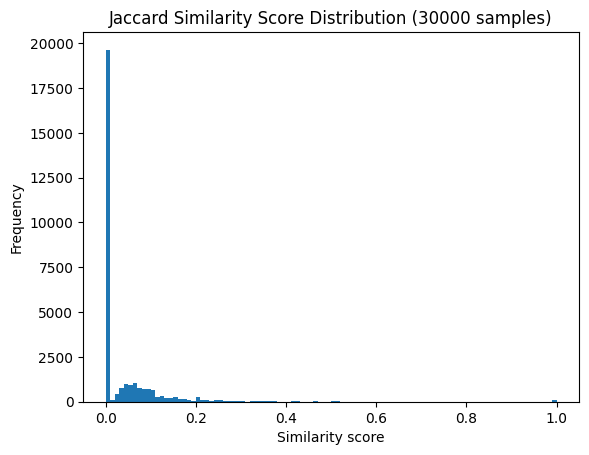

In [6]:
plt.hist(scores, bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Design Similarity Score Distribution (30000 samples)')
plt.show()

plt.hist(scores2, bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Jaccard Similarity Score Distribution (30000 samples)')
plt.show()

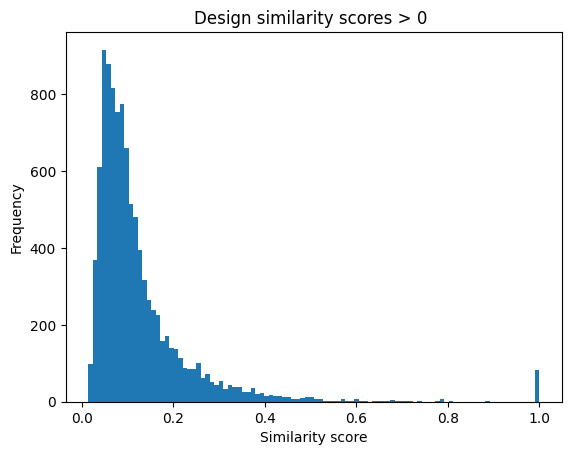

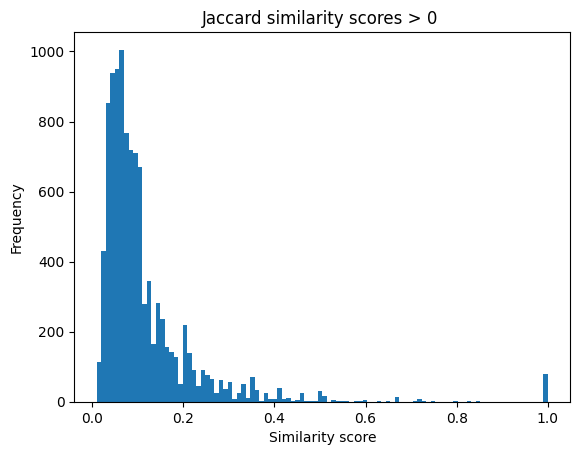

In [7]:
np_scores = np.array(scores)
plt.hist(np_scores[np_scores > 0], bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Design similarity scores > 0 ')
plt.show()

np_scores2 = np.array(scores2)
plt.hist(np_scores2[np_scores2 > 0], bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Jaccard similarity scores > 0 ')
plt.show()

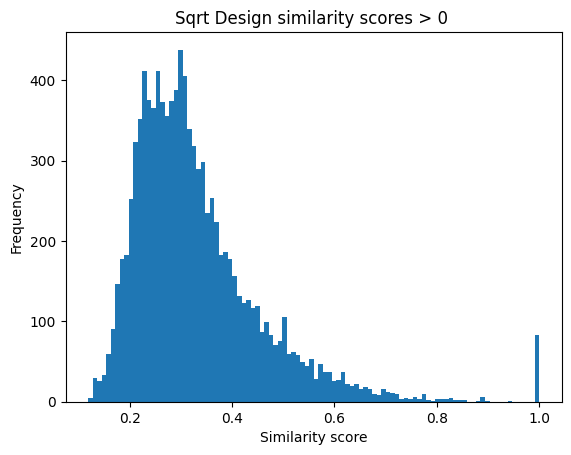

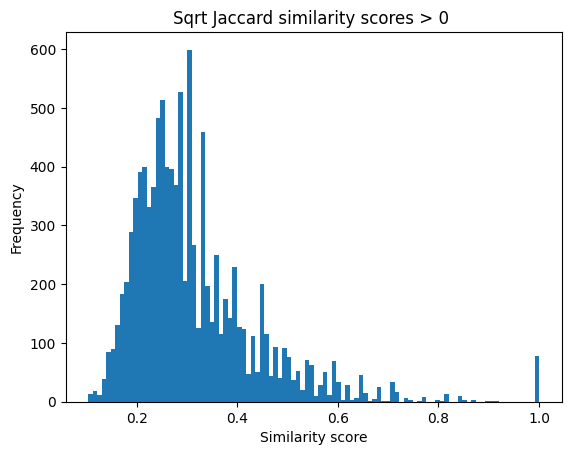

In [8]:
sqrt_np_scores = np.sqrt(np_scores)
plt.hist(sqrt_np_scores[np_scores > 0], bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Sqrt Design similarity scores > 0 ')
plt.show()

sqrt_np_scores2 = np.sqrt(np_scores2)
plt.hist(sqrt_np_scores2[np_scores2 > 0], bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Sqrt Jaccard similarity scores > 0 ')
plt.show()

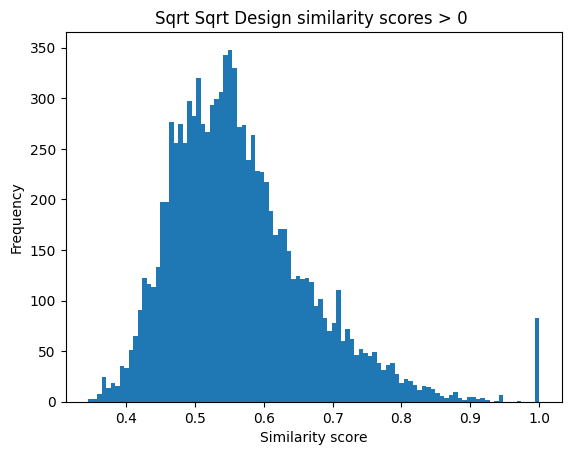

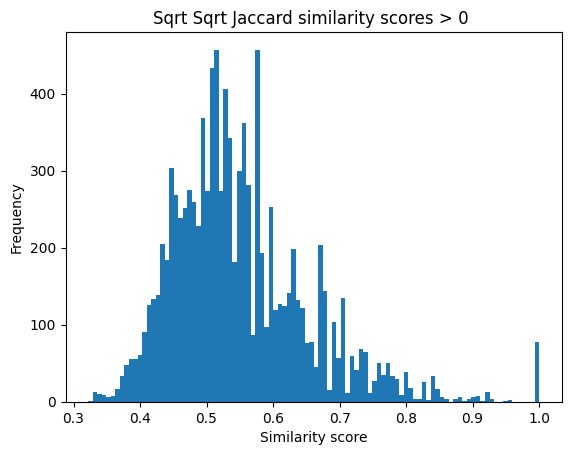

In [10]:
sqrt_sqrt_np_scores = np.sqrt(sqrt_np_scores)
plt.hist(sqrt_sqrt_np_scores[np_scores > 0], bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Sqrt Sqrt Design similarity scores > 0 ')
plt.show()

sqrt_sqrt_np_scores2 = np.sqrt(sqrt_np_scores2)
plt.hist(sqrt_sqrt_np_scores2[np_scores2 > 0], bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Sqrt Sqrt Jaccard similarity scores > 0 ')
plt.show()

In [75]:
colors = pd.read_csv('raw_colors.csv')

In [79]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

# assign weights to be the text from weigths.txt
weights = pd.read_csv('weights.txt', header=None)
weights = weights[0].values

def weighted_cosine_similarity(vec1, vec2):
    
    vec1 = vec1 * weights
    vec2 = vec2 * weights
    
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    score = dot_product / (norm_vec1 * norm_vec2)
    
    return score


def cosine_sim_generator(n):
    scores = []
    for i in range(n):
        x = colors.iloc[np.random.randint(0, 999)]
        y = colors.iloc[np.random.randint(0, 999)]
        scores.append(cosine_similarity(x, y))
        if i % 10000 == 0:
            print(i)
    return scores

def weighted_cosine_sim_generator(n):
    scores = []
    for i in range(n):
        x = colors.iloc[np.random.randint(0, 999)]
        y = colors.iloc[np.random.randint(0, 999)]
        scores.append(weighted_cosine_similarity(x, y))
        if i % 10000 == 0:
            print(i)
    return scores

In [80]:
cosine_scores = cosine_sim_generator(100000)
weighted_cosine_scores = weighted_cosine_sim_generator(100000)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
0
10000
20000
30000
40000
50000
60000
70000
80000
90000


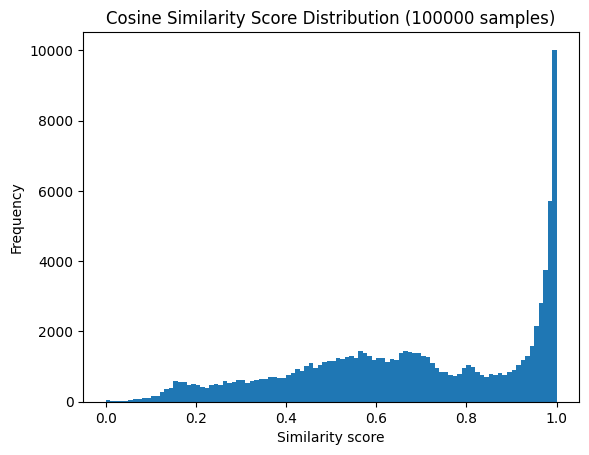

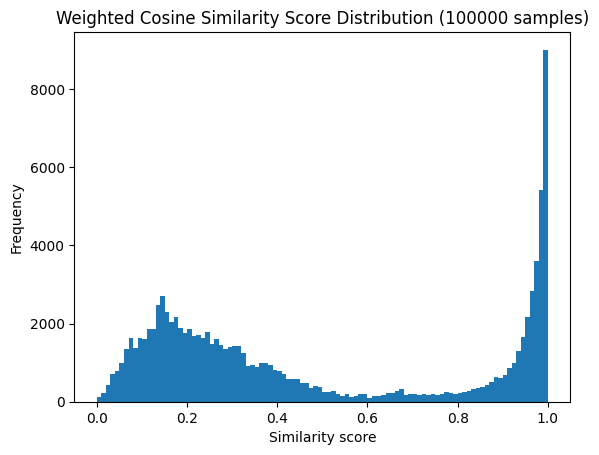

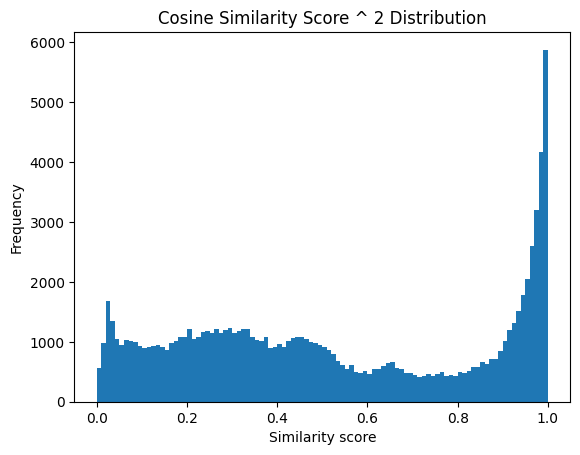

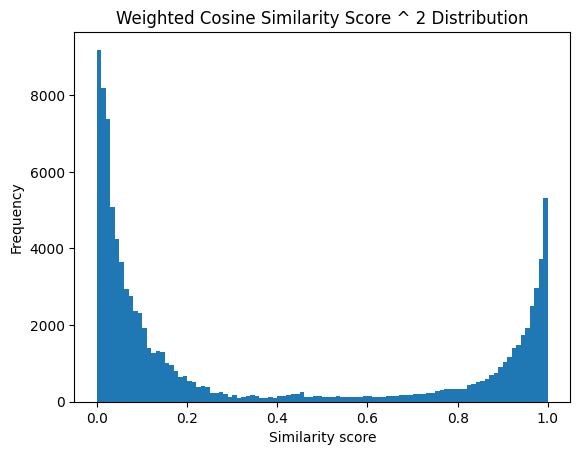

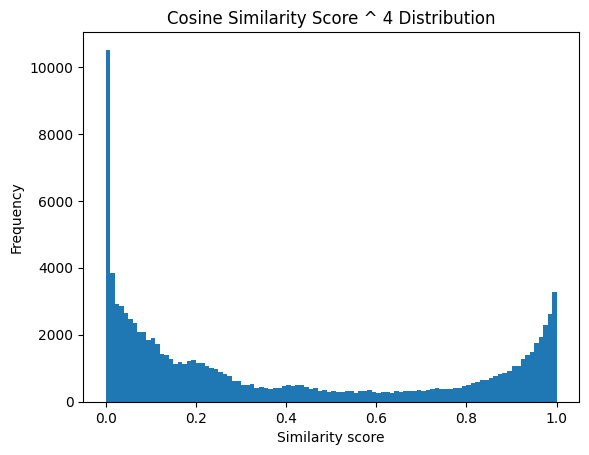

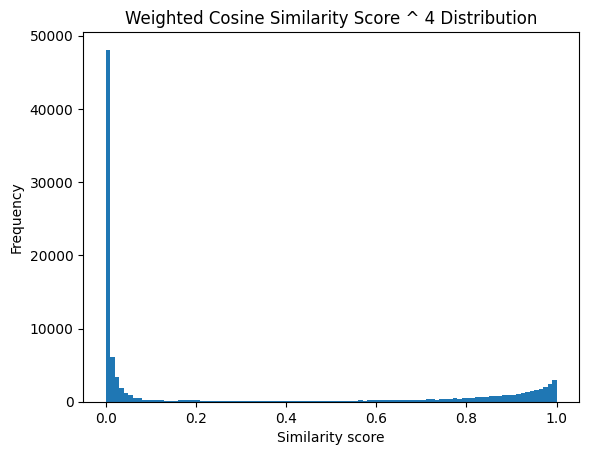

In [81]:
plt.hist(cosine_scores, bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Cosine Similarity Score Distribution (100000 samples)')
plt.show()

plt.hist(weighted_cosine_scores, bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Weighted Cosine Similarity Score Distribution (100000 samples)')
plt.show()

np_cosine_scores = np.array(cosine_scores)
np_weighted_cosine_scores = np.array(weighted_cosine_scores)
cosine_scores_2 = np_cosine_scores * np_cosine_scores
weighted_cosine_scores_2 = np_weighted_cosine_scores * np_weighted_cosine_scores

plt.hist(cosine_scores_2, bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Cosine Similarity Score ^ 2 Distribution')
plt.show()

plt.hist(weighted_cosine_scores_2, bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Weighted Cosine Similarity Score ^ 2 Distribution')
plt.show()


cosine_scores_4 = cosine_scores_2 * cosine_scores_2
weighted_cosine_scores_4 = weighted_cosine_scores_2 * weighted_cosine_scores_2

plt.hist(cosine_scores_4, bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Cosine Similarity Score ^ 4 Distribution')
plt.show()

plt.hist(weighted_cosine_scores_4, bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Weighted Cosine Similarity Score ^ 4 Distribution')
plt.show()


In [88]:
import nltk
from nltk.corpus import cmudict
import Levenshtein
import matplotlib.pyplot as plt

# Initialize an empty list to hold the titles
titles = []
try:
    with open('final_words.txt', 'r', encoding='utf-8') as f:
        for line in f:
            titles.append(line.strip())
except UnicodeDecodeError as e:
    print(f"Error reading words.txt: {e}")
    
d = cmudict.dict()

def word_to_phonetics(word):
    try:
        phonetic_representation = d[word.lower()][0]
        return phonetic_representation
    except KeyError:
        return None
    
def sentence_to_phonetics(sentence):
    words = sentence.split()
    phonetics = []
    for word in words:
        phonetic_representation = word_to_phonetics(word)
        if phonetic_representation:
            for phoneme in phonetic_representation:
                phonetics.append(phoneme)
        else:
            phonetics.append(word)
    return phonetics

def phonetic_similarity(phonetics1, phonetics2):
    # Join the phonetic representations into strings
    phonetic_str1 = ' '.join(phonetics1)
    phonetic_str2 = ' '.join(phonetics2)
    distance = Levenshtein.distance(phonetic_str1, phonetic_str2)
    max_len = max(len(phonetic_str1), len(phonetic_str2))
    if max_len == 0:
        return 1
    similarity = 1 - (distance / max_len)
    return similarity

def phonetic_similarity2(phonetics1, phonetics2):
    # Join the phonetic representations into strings
    phonetic_str1 = ''.join(phonetics1)
    phonetic_str2 = ''.join(phonetics2)
    distance = Levenshtein.distance(phonetic_str1, phonetic_str2)
    max_len = max(len(phonetic_str1), len(phonetic_str2))
    if max_len == 0:
        return 1
    similarity = 1 - (distance / max_len)
    return similarity

def generate_phonetic_similarity_scores(n):
    scores = []
    scores2 = []
    for i in range(n):
        title1 = titles[np.random.randint(0, 999)]
        title2 = titles[np.random.randint(0, 999)]
        phonetics1 = sentence_to_phonetics(title1)
        phonetics2 = sentence_to_phonetics(title2)
        scores.append(phonetic_similarity(phonetics1, phonetics2))
        scores2.append(phonetic_similarity2(phonetics1, phonetics2))
        if i % 100000 == 0:
            print(i)
    return scores, scores2

In [89]:
scores, scores2 = generate_phonetic_similarity_scores(1000000)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000


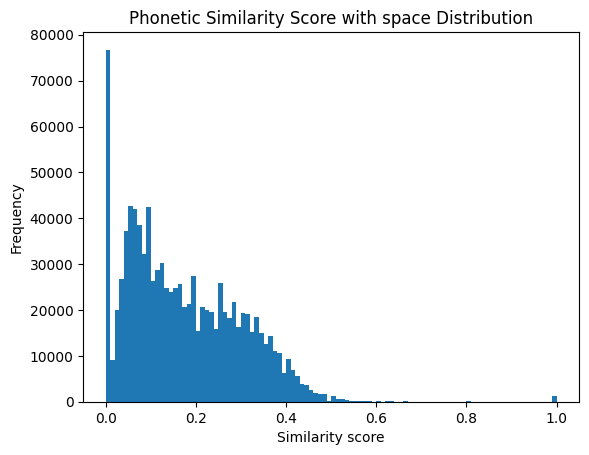

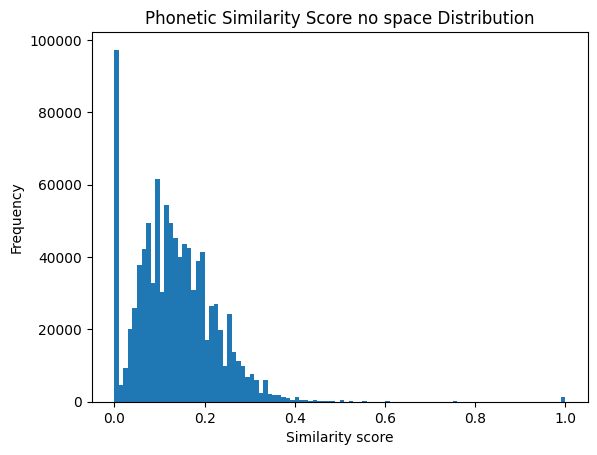

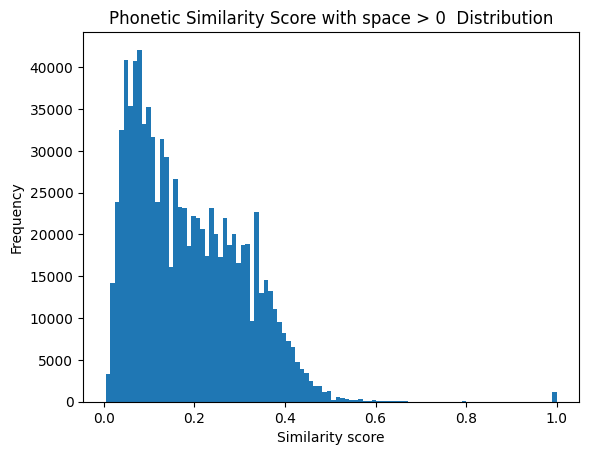

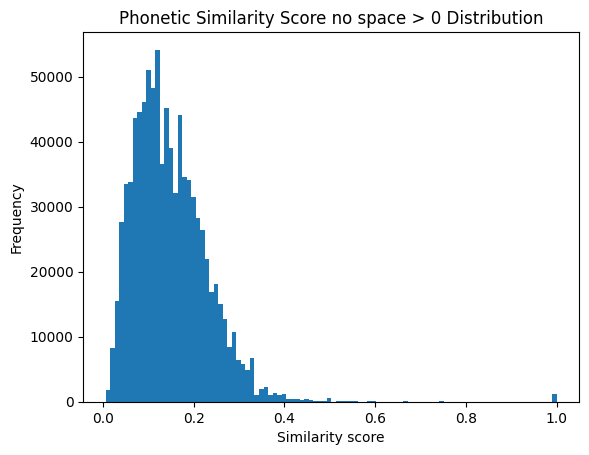

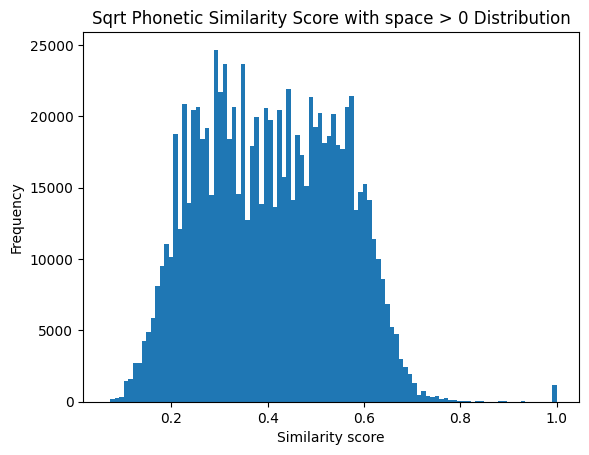

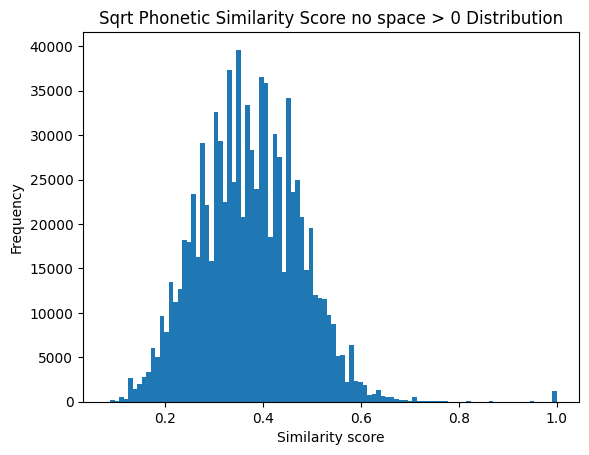

In [91]:
plt.hist(scores, bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Phonetic Similarity Score with space Distribution')
plt.show()

plt.hist(scores2, bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Phonetic Similarity Score no space Distribution')
plt.show()

plt.hist([s for s in scores if s > 0], bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Phonetic Similarity Score with space > 0  Distribution')
plt.show()

plt.hist([s for s in scores2 if s > 0], bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Phonetic Similarity Score no space > 0 Distribution')
plt.show()

np_scores = np.array(scores)
np_scores2 = np.array(scores2)
np_scores_sqrt = np.sqrt(np_scores)
np_scores2_sqrt = np.sqrt(np_scores2)

plt.hist([s for s in np_scores_sqrt if s > 0], bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Sqrt Phonetic Similarity Score with space > 0 Distribution')
plt.show()

plt.hist([s for s in np_scores2_sqrt if s > 0], bins=100)
plt.xlabel('Similarity score')
plt.ylabel('Frequency')
plt.title('Sqrt Phonetic Similarity Score no space > 0 Distribution')
plt.show()
